In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import statistics as st
from matplotlib.pyplot import figure

%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
api_key = '00ef9804fcde0edd93b1b4821ee2f06a'
# api_key = 'c81352430e2fe3c941faf0814227562b'

data

In [4]:

''' Колонки '''
ticker = 'DRI'
# ticker = 'AAPL'



''' для фильтрации'''
filt_start_date = '1999'
filt_finish_date = '2022'


''' время '''
stime=f'{str(int(filt_start_date)-1)}-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'



In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df_market = get_data_from_ticker('^GSPC', stime, None, period)
df.tail(3)

,DRI
Date,
2022-11-01 00:00:00-04:00,145.779922
2022-12-01 00:00:00-05:00,137.191208
2023-01-01 00:00:00-05:00,148.369995


change index

In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df_market  = change_index(df_market)
df.head(3)

,DRI
Date_index,
1998-01-01,4.504398
1998-02-01,4.769364
1998-03-01,5.498018


key_metrics

In [7]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2022,FY,75.352113,7.455399,9.828638,6.679186,3.29108,17.200313,2.204225,17.200313,38.79421,14709779808.299999,19176479808.299999,15.438476,1.527495,11.710676,17.232638,6.691739,6.691739,1.991327,12.528734,15.266682,22.465417,0.064773,0.058029,2.131198,0.783125,2.918267,0.638376,16.461756,1.318325,0.038274,0.59089,0.038754,0,0.189082,-0.320436,-0.041796,-1.092562,0.006282,53.714914,0.140222,0.115922,-57.337246,-668100000,281700000,-6758200000,2.223319,70100000,335700000,230700000,2.728972,17.540079,12.936346,133.75,20.809485,28.215078,0.433446,-3.149452
2021,FY,55.184816,4.82592,9.156442,7.083589,9.315184,21.572853,6.921012,21.572853,40.397239,18750215126.32,22738115126.32,29.795352,2.605608,15.703698,20.299031,6.665321,6.665321,3.159783,22.979399,19.043648,24.616342,0.033562,0.049263,1.783975,0.73601,4.030217,1.012336,9.949387,1.897346,0.010805,0.321945,0.055058,0,0.179296,-0.226382,-0.037562,-0.770305,0.010061,48.398859,0.073651,0.071957,-49.706672,22800000,902500000,-5971900000,1.849419,68200000,304500000,190800000,3.459235,19.489794,12.212324,105.514663,18.72775,29.887841,0.223703,-2.072853
2020,FY,63.625917,-0.427058,5.797066,1.848411,6.220864,18.999185,3.976365,18.999185,46.484108,9296978582.82,14175078582.82,-177.423255,1.190867,13.070404,40.991969,3.988066,3.988066,1.815712,55.829376,19.928411,62.500346,-0.005636,0.024395,2.232799,0.765617,19.212682,0.614346,0.770096,-13.574427,0.034667,-6.150763,0.048214,0,0.185329,-0.681147,-0.06206,-1.361337,0.006789,13.511455,0.005875,-0.006467,-54.692747,-691400000,487900000,-6513500000,2.419955,59000000,276950000,198850000,2.328325,14.226928,11.802532,156.76506,25.655573,30.925568,-0.022478,-3.948655


In [8]:
df_key_metr = df_key_metr.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_key_metr.index.to_list()
# index_years


In [9]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_market_prices = get_price_from_df(df_market, index_years)

In [10]:
df_key_metr[ticker] = list(stock_year_prices)
df_key_metr['SNP'] = list(stock_year_market_prices)
df_key_metr.drop('period', axis=1, inplace=True)

# df_key_metr.head(3)

financial_rations

In [11]:
df_fin_rat = fa.financial_ratios(ticker, api_key, period='annual')
df_fin_rat = df_fin_rat.T
df_fin_rat.head(3)

,period,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,netIncomePerEBT,ebtPerEbit,ebitPerRevenue,debtRatio,debtEquityRatio,longTermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,receivablesTurnover,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatio,dividendPaidAndCapexCoverageRatio,dividendPayoutRatio,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
2022,FY,0.638376,0.266631,0.227659,2.728972,12.936346,15.665318,17.540079,-1.874761,0.207165,0.120685,0.113551,0.098941,0.126932,0.094003,0.433446,0.140222,0.871331,0.940888,0.120685,0.783125,3.610954,0.680633,0.689761,16.461756,0.257013,4.610954,133.75,20.809485,28.215078,1.411796,0.950098,9.828638,6.679186,3.29108,0.59089,0.130436,0.679564,0.257013,6.202963,-3.120745,7.826168,0.59089,6.691739,6.691739,1.527495,15.438476,17.232638,11.710676,11.710676,0.283528,1.527495,0.038274,12.528734,6.691739
2021,FY,1.012336,0.694097,0.657199,3.459235,12.212324,15.671559,19.489794,-3.818235,0.207543,0.090146,0.080113,0.08745,-0.096964,0.059055,0.223703,0.073651,1.091587,0.8887,0.090146,0.73601,2.788027,0.640801,0.649051,9.949387,0.229501,3.788027,105.514663,18.72775,29.887841,1.082837,0.675303,9.156442,7.083589,9.315184,0.321945,0.165923,0.773618,0.229501,6.485606,-4.417314,-17.636632,0.321945,6.665321,6.665321,2.605608,29.795352,20.299031,15.703698,15.703698,0.024357,2.605608,0.010805,22.979399,6.665321
2020,FY,0.614346,0.453536,0.425759,2.328325,11.802532,14.130857,14.226928,-0.096071,0.180405,0.006136,-0.020623,-0.006712,0.69441,-0.005268,-0.022478,0.005875,0.325466,-3.361169,0.006136,0.765617,3.266515,0.69067,0.707599,0.770096,0.126086,4.266515,156.76506,25.655573,30.925568,1.160687,0.784921,5.797066,1.848411,6.220864,-6.150763,0.091112,0.318853,0.126086,1.6303,-1.468111,-4.385327,-6.150763,3.988066,3.988066,1.190867,-177.423255,40.991969,13.070404,13.070404,1.651379,1.190867,0.034667,55.829376,3.988066


In [12]:

df_fin_rat = df_fin_rat.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_fin_rat.index.to_list()
# index_years

In [13]:
df_fin_rat[ticker] = list(stock_year_prices)
df_fin_rat['SNP'] = list(stock_year_market_prices)

# df_key_metr.head(3)

income_statement

In [14]:
df_inc_stat = fa.income_statement(ticker, api_key)
df_inc_stat = df_inc_stat.T
df_inc_stat.head(3)

,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,costAndExpenses,interestIncome,interestExpense,depreciationAndAmortization,ebitda,ebitdaratio,operatingIncome,operatingIncomeRatio,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
2022,USD,0000940944,2022-07-22,2022-07-22 15:57:51,2022,FY,9630000000,7635000000,1995000000,0.207165,0,373200000,93200000,466400000,368400000,834800000,8469800000,1900000,70600000,368400000,1530600000,0.158941,1162200000,0.120685,-68700000,1093500000,0.113551,138800000,952800000,0.098941,7.46,7.39,127800000,129000000,https://www.sec.gov/Archives/edgar/data/940944...,https://www.sec.gov/Archives/edgar/data/940944...
2021,USD,0000940944,2021-07-23,2021-05-30 20:00:00,2021,FY,7196100000,5702600000,1493500000,0.207543,0,396200000,91100000,487300000,350900000,838200000,6540800000,1700000,65200000,350900000,989500000,0.137505,648700000,0.090146,-72200000,576500000,0.080113,-55900000,629300000,0.08745,4.83,4.77,130400000,131800000,https://www.sec.gov/Archives/edgar/data/940944...,https://www.sec.gov/Archives/edgar/data/940944...
2020,USD,0000940944,2020-07-24,2020-07-24 16:44:20,2020,FY,7806900000,6398500000,1408400000,0.180405,0,376400000,238000000,614400000,355900000,970300000,7368800000,4900000,62200000,355900000,253900000,0.032523,47900000,0.006136,-208900000,-161000000,-0.020623,-111800000,-52400000,-0.006712,-0.43,-0.43,122700000,122700000,https://www.sec.gov/Archives/edgar/data/940944...,https://www.sec.gov/Archives/edgar/data/940944...


In [15]:
df_inc_stat = df_inc_stat.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_inc_stat.index.to_list()
# index_years

In [16]:
df_inc_stat[ticker] = list(stock_year_prices)
df_inc_stat['SNP'] = list(stock_year_market_prices)
# df_inc_stat.drop('period', axis=1, inplace=True)

df_inc_stat.columns.to_list()

['reportedCurrency',
 'cik',
 'fillingDate',
 'acceptedDate',
 'calendarYear',
 'period',
 'revenue',
 'costOfRevenue',
 'grossProfit',
 'grossProfitRatio',
 'researchAndDevelopmentExpenses',
 'generalAndAdministrativeExpenses',
 'sellingAndMarketingExpenses',
 'sellingGeneralAndAdministrativeExpenses',
 'otherExpenses',
 'operatingExpenses',
 'costAndExpenses',
 'interestIncome',
 'interestExpense',
 'depreciationAndAmortization',
 'ebitda',
 'ebitdaratio',
 'operatingIncome',
 'operatingIncomeRatio',
 'totalOtherIncomeExpensesNet',
 'incomeBeforeTax',
 'incomeBeforeTaxRatio',
 'incomeTaxExpense',
 'netIncome',
 'netIncomeRatio',
 'eps',
 'epsdiluted',
 'weightedAverageShsOut',
 'weightedAverageShsOutDil',
 'link',
 'finalLink',
 'DRI',
 'SNP']

stock data detailed

In [17]:
stock_data_detailed = fa.stock_data_detailed(ticker, api_key)
stock_data_detailed

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
2023-01-27,150,150,147.86,148.37,148.37,852307,852300,-1.63,-1.087,148.74333,"January 27, 23",-0.01087
2023-01-26,148.21,149.63,148.15,149.3,149.3,802539,802500,1.09,0.735,149.02667,"January 26, 23",0.00735
2023-01-25,145.22,147.91,144.83,147.78,147.78,872753,872700,2.56,1.763,146.84,"January 25, 23",0.01763
2023-01-24,148.43,148.43,145.5,145.98,145.98,940231,940200,-2.45,-1.651,146.63667,"January 24, 23",-0.01651
2023-01-23,147.87,148.46,146.99,148.1,148.1,652302,652300,0.23,0.156,147.85,"January 23, 23",0.00156
...,...,...,...,...,...,...,...,...,...,...,...,...
1995-05-15,6.2573,6.331792,6.2573,6.2573,3.641283,1119421,1119421,-2.61602,-41.807,5.41012,"May 15, 95",-0.41807
1995-05-12,6.331792,6.406283,6.2573,6.2573,3.641283,1584909,1584909,-2.69051,-42.492,5.43496,"May 12, 95",-0.42492
1995-05-11,6.182808,6.406283,6.182808,6.331792,3.684631,3039098,3039098,-2.49818,-40.405,5.42457,"May 11, 95",-0.40405
1995-05-10,5.959333,6.331792,5.959333,6.182808,3.597936,4705896,4705896,-2.3614,-39.625,5.29635,"May 10, 95",-0.39625


dividents

In [18]:
stock_dividend = fa.stock_dividend(ticker, api_key)

percent of dividents

In [19]:
concat_divid_stock = pd.concat([stock_data_detailed, stock_dividend], axis=1, sort=False)

# concat_divid_stock[(concat_divid_stock.val > 0.5) & (concat_divid_stock.val2 == 1)]
concat_divid_stock = concat_divid_stock.dropna()
concat_divid_stock['percent_dividents'] = concat_divid_stock['dividend'] / (concat_divid_stock['close']/100)
concat_divid_stock = concat_divid_stock.loc[filt_finish_date:filt_start_date].copy(deep=True)
sum_div = concat_divid_stock['percent_dividents'].sum()


change_percent_all_columns

In [20]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                # if y != len(v):
                #     vv = (v[y] / (v[y+1] / 100)) - 100
                #     l.append(vv)
                #     # print(vv)
                if y != len(v):
                    if v[y] < 0 and v[y+1] > 0:
                        l.append('Minus')
                    elif v[y] > 0 and v[y+1] < 0:
                        l.append('Plus')
                    else:
                        vv = (v[y] / (v[y+1] / 100)) - 100
                        l.append(vv)  
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes_key = change_percent_all_columns(df_key_metr)
df_with_changes_fin_rat = change_percent_all_columns(df_fin_rat)
df_with_changes_inc_stat = change_percent_all_columns(df_inc_stat)


Vizualization key_metrics

In [21]:
''' necessary columns '''

x = 'change % revenuePerShare'
y = 'change % cashPerShare'
z = 'change % averageInventory'
e = 'change % debtToAssets'
z1 = 'change % cashPerShare'
e1 = 'change % debtToAssets'

In [22]:
df_with_changes_key = df_with_changes_key.reindex(index=df_with_changes_key.index[::-1])

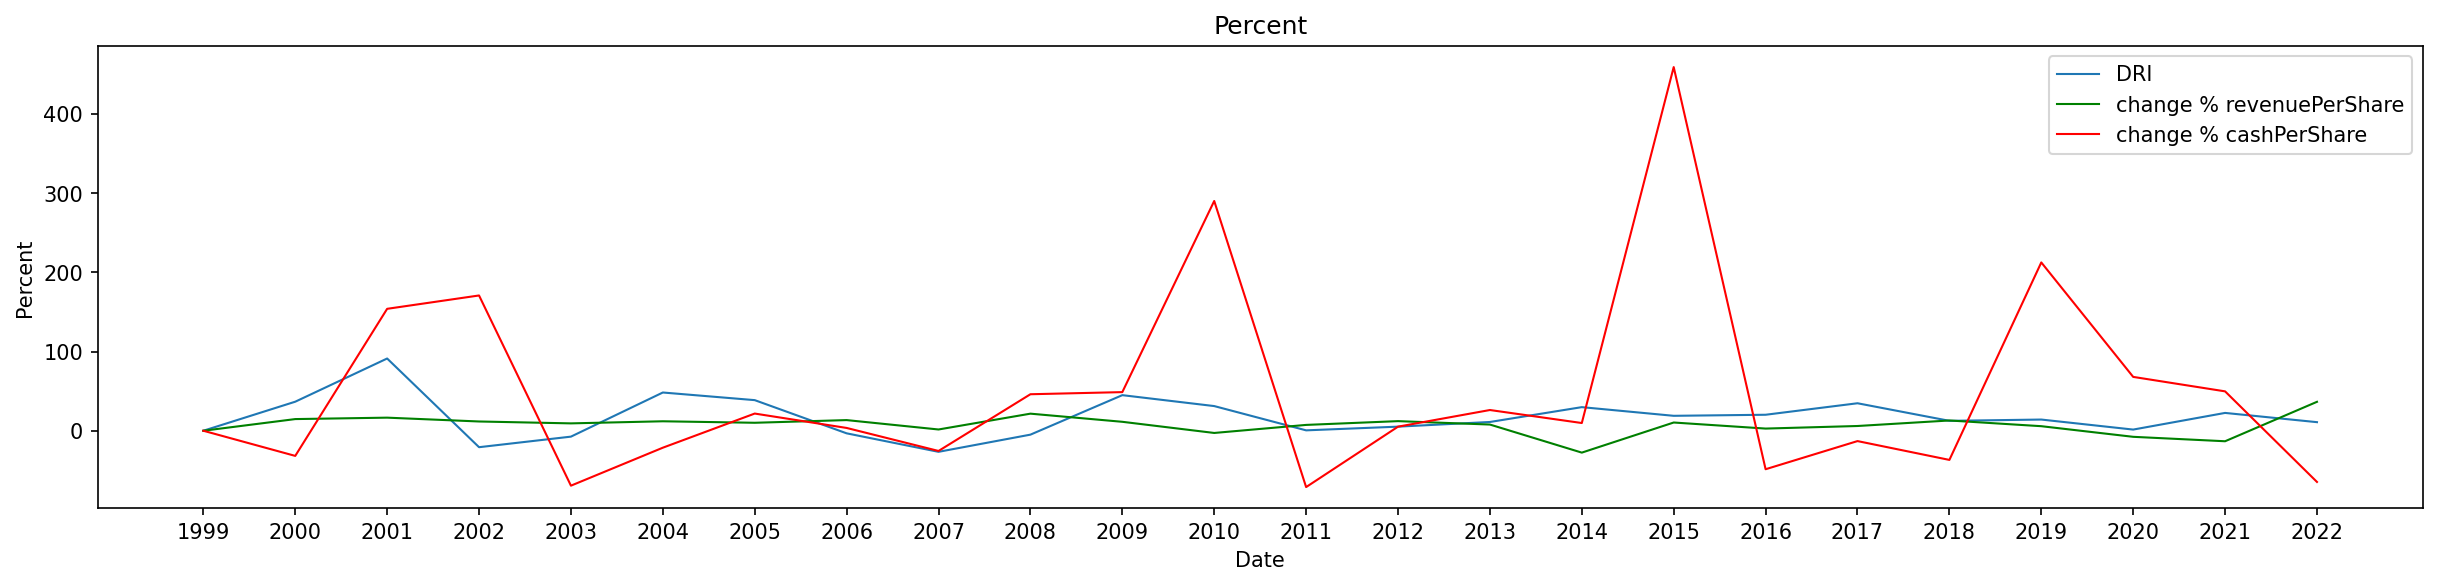

In [23]:
# plot size
figure(figsize=(20,4), dpi=150)


# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


# Plot 
plt.plot(df_with_changes_key[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes_key[x],'g',lw=1, label=x)
plt.plot(df_with_changes_key[y],'r', lw=1, label=y)

# Add a legend to the axis
plt.legend()

plt.show()

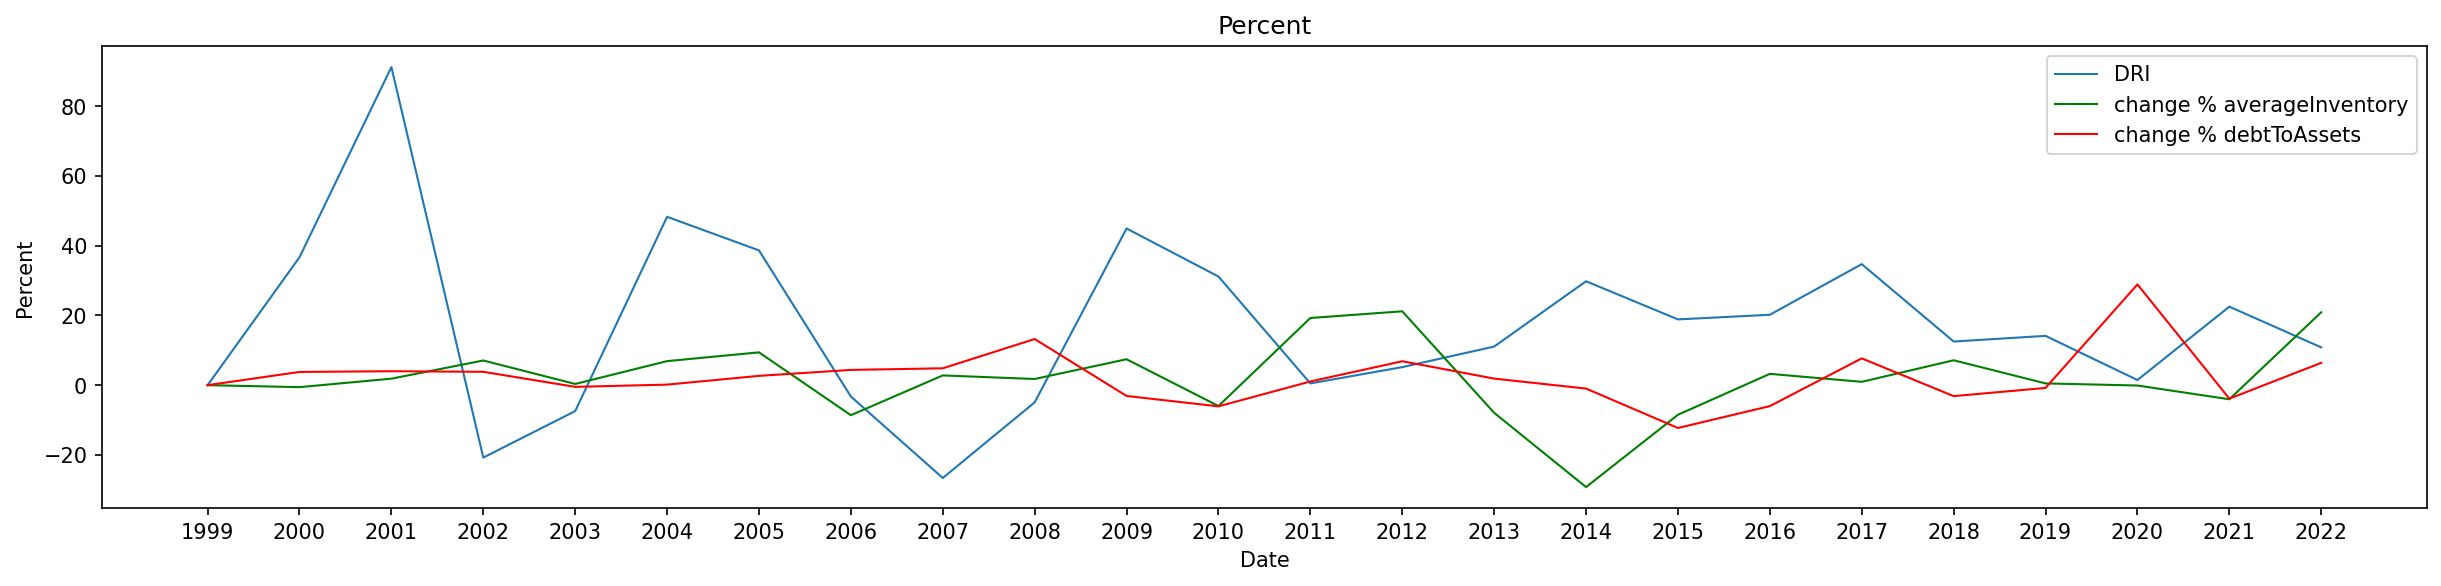

In [24]:
# plot size
figure(figsize=(20,4), dpi=150)

plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')




# Plot close price and moving averages
plt.plot(df_with_changes_key[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes_key[z],'g',lw=1, label=z)
plt.plot(df_with_changes_key[e],'r', lw=1, label=e)

# Add a legend to the axis
plt.legend()

plt.show()

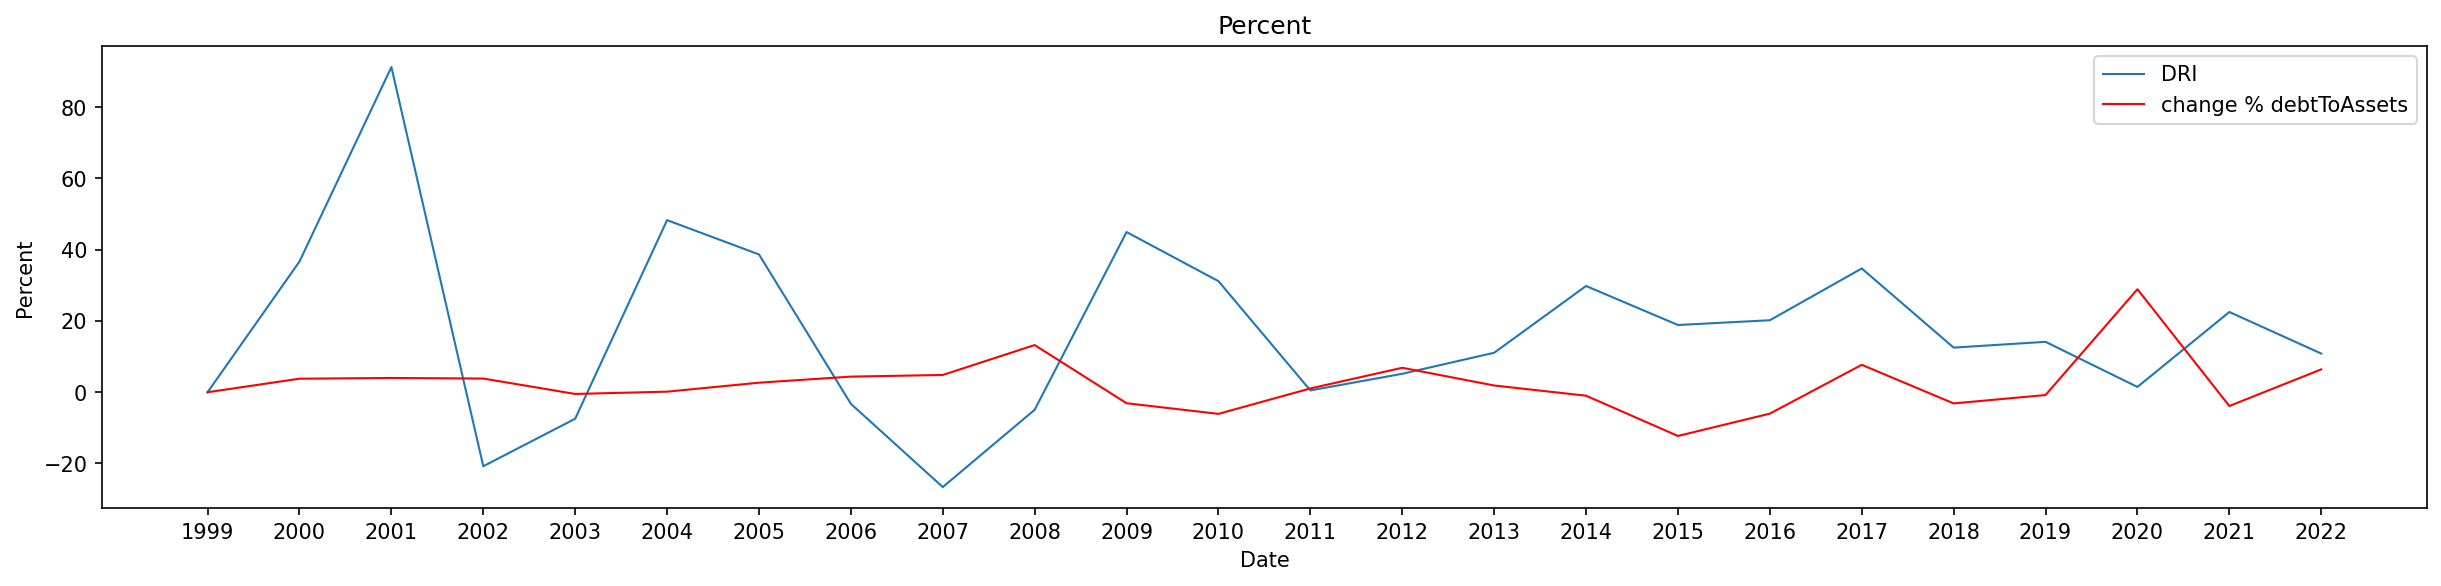

In [25]:
# plot size
figure(figsize=(20,4), dpi=150)


plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')




# Plot close price and moving averages
plt.plot(df_with_changes_key[f'change % {ticker}'],lw=1, label=ticker)
# plt.plot(df_with_changes_key[z1],'g',lw=1, label=z1)
plt.plot(df_with_changes_key[e1],'r', lw=1, label=e1)

# Add a legend to the axis
plt.legend()

plt.show()

In [26]:
df_inc_stat.head(3)

,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,costAndExpenses,interestIncome,interestExpense,depreciationAndAmortization,ebitda,ebitdaratio,operatingIncome,operatingIncomeRatio,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink,DRI,SNP,change % reportedCurrency,change % cik,change % fillingDate,change % acceptedDate,change % calendarYear,change % period,change % revenue,change % costOfRevenue,change % grossProfit,change % grossProfitRatio,change % researchAndDevelopmentExpenses,change % generalAndAdministrativeExpenses,change % sellingAndMarketingExpenses,change % sellingGeneralAndAdministrativeExpenses,change % otherExpenses,change % operatingExpenses,change % costAndExpenses,change % interestIncome,change % interestExpense,change % depreciationAndAmortization,change % ebitda,change % ebitdaratio,change % operatingIncome,change % operatingIncomeRatio,change % totalOtherIncomeExpensesNet,change % incomeBeforeTax,change % incomeBeforeTaxRatio,change % incomeTaxExpense,change % netIncome,change % netIncomeRatio,change % eps,change % epsdiluted,change % weightedAverageShsOut,change % weightedAverageShsOutDil,change % link,change % finalLink,change % DRI,change % SNP
2022,USD,0000940944,2022-07-22,2022-07-22 15:57:51,2022,FY,9630000000,7635000000,1995000000,0.207165,0,373200000,93200000,466400000,368400000,834800000,8469800000,1900000,70600000,368400000,1530600000,0.158941,1162200000,0.120685,-68700000,1093500000,0.113551,138800000,952800000,0.098941,7.46,7.39,127800000,129000000,https://www.sec.gov/Archives/edgar/data/940944...,https://www.sec.gov/Archives/edgar/data/940944...,148.369995,4070.560059,0,0,0,0,0,0,33.822487,33.886297,33.578842,-0.182066,0,-5.805149,2.305159,-4.288939,4.987176,-0.405631,29.491805,11.764706,8.282209,4.987176,54.684184,15.589082,79.158317,33.877587,-4.847645,89.679098,41.739331,Plus,51.406324,13.139673,54.451346,54.926625,-1.993865,-2.124431,0,0,10.838491,-9.854608
2021,USD,0000940944,2021-07-23,2021-05-30 20:00:00,2021,FY,7196100000,5702600000,1493500000,0.207543,0,396200000,91100000,487300000,350900000,838200000,6540800000,1700000,65200000,350900000,989500000,0.137505,648700000,0.090146,-72200000,576500000,0.080113,-55900000,629300000,0.08745,4.83,4.77,130400000,131800000,https://www.sec.gov/Archives/edgar/data/940944...,https://www.sec.gov/Archives/edgar/data/940944...,133.861435,4515.549805,0,0,0,0,0,0,-7.823848,-10.875987,6.042318,15.043116,0,5.260361,-61.722689,-20.686849,-1.404889,-13.614346,-11.236565,-65.306122,4.823151,-1.404889,289.720362,322.799558,1254.279749,1369.230080,-65.438009,Plus,Plus,-50.0,Plus,Plus,Plus,Plus,6.275469,7.416463,0,0,22.511819,21.573991
2020,USD,0000940944,2020-07-24,2020-07-24 16:44:20,2020,FY,7806900000,6398500000,1408400000,0.180405,0,376400000,238000000,614400000,355900000,970300000,7368800000,4900000,62200000,355900000,253900000,0.032523,47900000,0.006136,-208900000,-161000000,-0.020623,-111800000,-52400000,-0.006712,-0.43,-0.43,122700000,122700000,https://www.sec.gov/Archives/edgar/data/940944...,https://www.sec.gov/Archives/edgar/data/940944...,109.264099,3714.239990,0,0,0,0,0,0,-8.266356,-3.946618,-23.829097,-16.965139,0,-7.176326,-6.776342,-7.021792,5.702406,-2.726817,-3.787750,28.947368,15.185185,5.702406,-78.258263,-76.299059,-94.246246,-93.727761,316.135458,Minus,Minus,Minus,Minus,Minus,Minus,Minus,-0.647773,-2.153110,0,0,1.477178,15.151664


Vizualization income_statement

In [27]:
''' necessary columns '''

is0 = f'{ticker}'
is1 = f'change % {ticker}'
is2 = 'SNP'
is3 = 'change % SNP'
is4 =  'revenue'
is5 =  'costOfRevenue'
is6 =  'grossProfit'
is7 =  'grossProfitRatio'
is8 =  'researchAndDevelopmentExpenses'
is9 =  'sellingGeneralAndAdministrativeExpenses'
is10 =  'operatingExpenses'
is11 =  'costAndExpenses'
is12 =  'interestIncome'
is13 =  'interestExpense'
is14 =  'depreciationAndAmortization'
is15 =  'ebitda'
is16 =  'ebitdaratio'
is17 =  'operatingIncome'
is18 =  'operatingIncomeRatio'
is19 =  'totalOtherIncomeExpensesNet'
is20 =  'incomeBeforeTax'
is21 =  'incomeBeforeTaxRatio'
is22 =  'incomeTaxExpense'
is23 =  'netIncome'
is24 =  'netIncomeRatio'
is25 =  'eps'
is26 =  'epsdiluted'
is27 =  'weightedAverageShsOut'
is28 =  'weightedAverageShsOutDil'
is29 =  'change % revenue'
is30 =  'change % costOfRevenue'
is31 =  'change % grossProfit'
is32 =  'change % grossProfitRatio'
is33 =  'change % researchAndDevelopmentExpenses'
is34 =  'change % generalAndAdministrativeExpenses'
is35 =  'change % sellingAndMarketingExpenses'
is36 =  'change % sellingGeneralAndAdministrativeExpenses'
is37 =  'change % otherExpenses'
is38 =  'change % operatingExpenses'
is39 =  'change % costAndExpenses'
is40 =  'change % interestIncome'
is41 =  'change % interestExpense'
is42 =  'change % depreciationAndAmortization'
is43 =  'change % ebitda'
is44 =  'change % ebitdaratio'
is45 =  'change % operatingIncome'
is46 =  'change % operatingIncomeRatio'
is47 =  'change % totalOtherIncomeExpensesNet'
is48 =  'change % incomeBeforeTax'
is49 =  'change % incomeBeforeTaxRatio'
is50 =  'change % incomeTaxExpense'
is51 =  'change % netIncome'
is52 =  'change % netIncomeRatio'
is53 =  'change % eps'
is54 =  'change % epsdiluted'
is55 =  'change % weightedAverageShsOut'
is56 =  'change % weightedAverageShsOutDil'

In [28]:
df_with_changes_inc_stat = df_with_changes_inc_stat.reindex(index=df_with_changes_inc_stat.index[::-1])

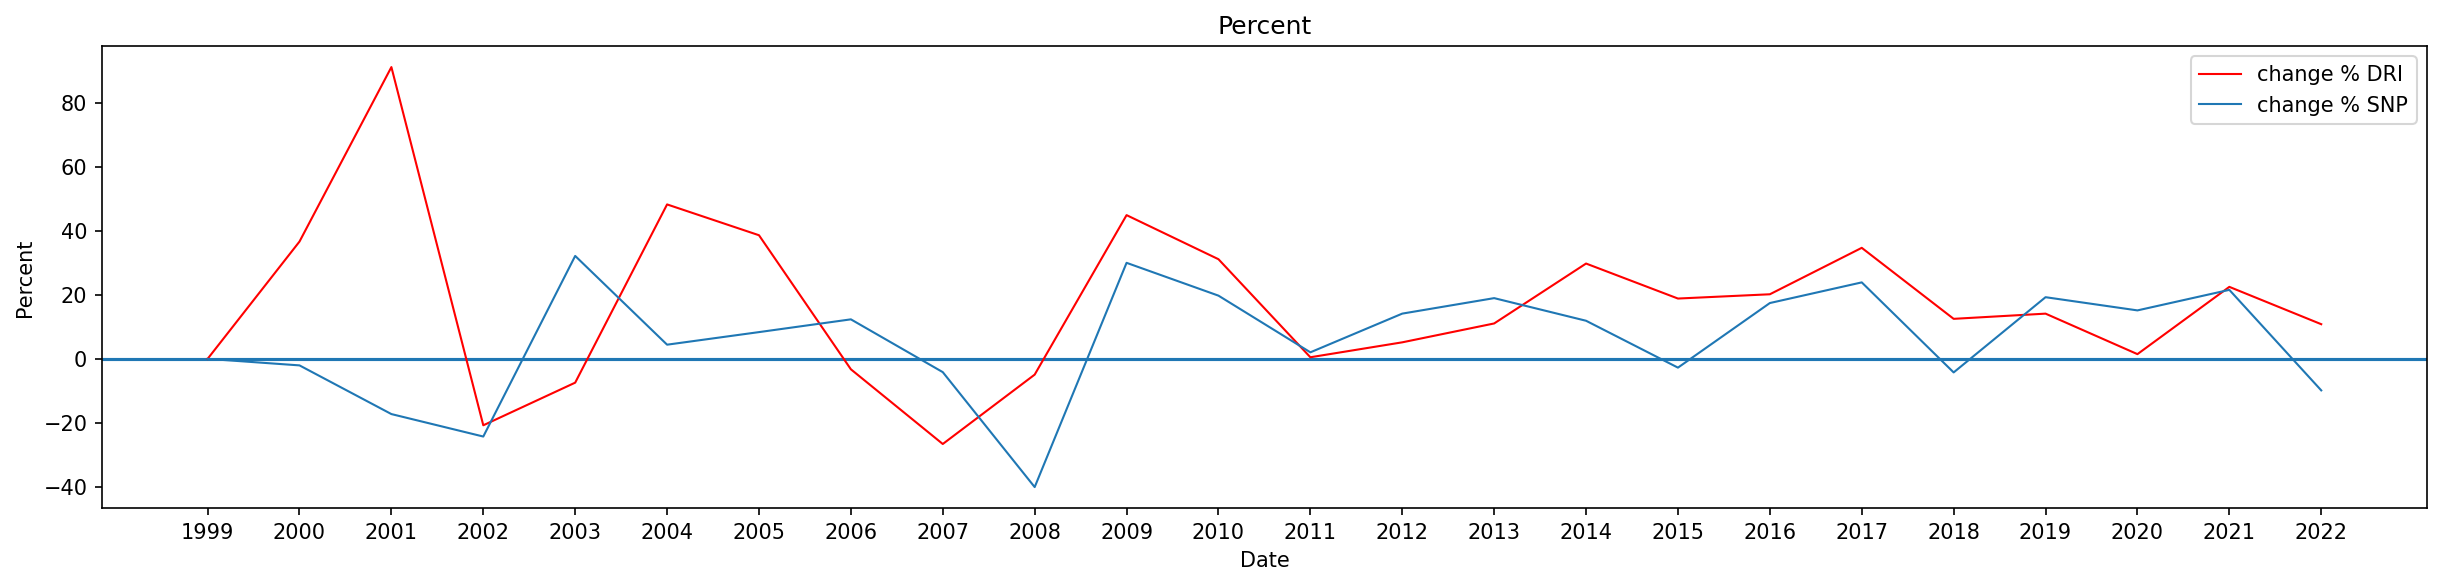

In [29]:

# plot size
figure(figsize=(20,4), dpi=150)

plt.axhline(y=0, linestyle='-')

# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


# Plot 
# plt.plot(df_with_changes_inc_stat[is0],lw=1, label=is0)
plt.plot(df_with_changes_inc_stat[is1],'r',lw=1, label=is1)
# plt.plot(df_with_changes_inc_stat[is2],'g',lw=1, label=is2)
plt.plot(df_with_changes_inc_stat[is3], lw=1, label=is3)

# Add a legend to the axis
plt.legend()

plt.show()

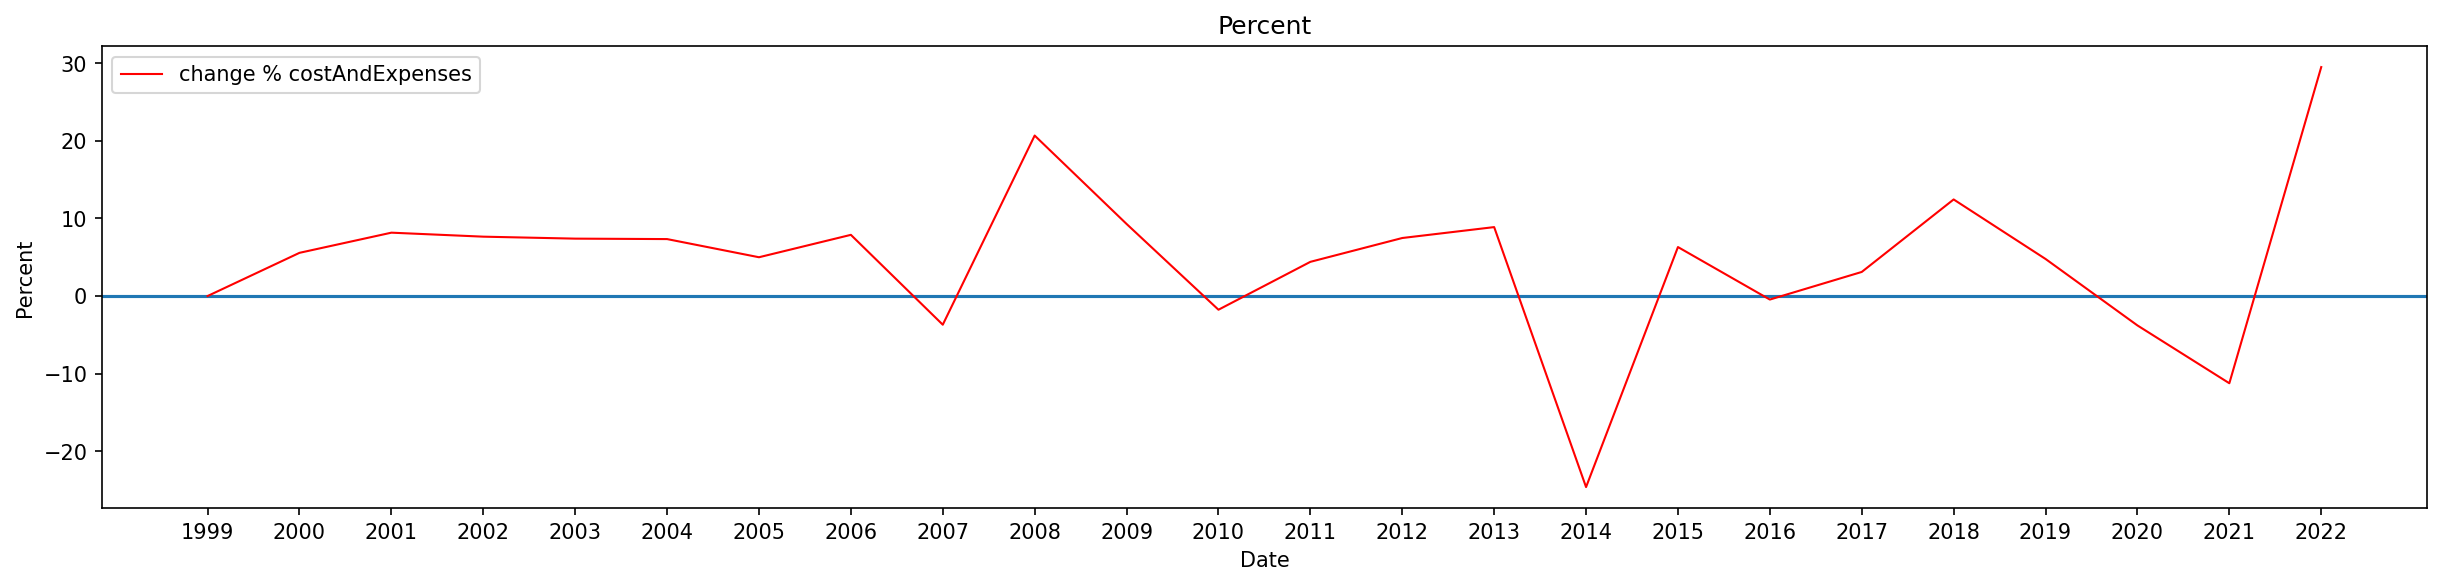

In [30]:
# plot size
figure(figsize=(20,4), dpi=150)

plt.axhline(y=0, linestyle='-')

# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')




# Plot 

# plt.plot(df_with_changes_inc_stat[is16],'r', lw=1, label=is16)
# plt.plot(df_with_changes_inc_stat[is38],'g', lw=1, label=is38)
plt.plot(df_with_changes_inc_stat[is39],'r', lw=1, label=is39)
# plt.plot(df_with_changes_inc_stat[is40],'b', lw=1, label=is40)
# plt.plot(df_with_changes_inc_stat[is41],'g', lw=1, label=is41)
# plt.plot(df_with_changes_inc_stat[is42],'y', lw=1, label=is42)
# Add a legend to the axis
plt.legend()

plt.show()

dividents results

In [31]:
# stock_dividend = fa.stock_dividend(ticker, api_key)


# def get_date_dividents(df):
#     df_index = df.index.to_list()
#     for i in range(len(df_index)):
#         t = df_index[i][0:4]
#         df_index[i] = t
        
        

#     df['Date_index'] = df_index
#     df = df.set_index('Date_index')
#     return df

# df_dividents = get_date_dividents(stock_dividend)
# # df_dividents

# df_dividents = df_dividents.loc[filt_finish_date:filt_start_date].copy(deep=True)


math

In [32]:
sum_div

51.88126444691464

In [33]:
df_with_changes_inc_stat[f'change % {ticker}'].sum()

409.73060814437576

In [34]:
df_with_changes_inc_stat[f'change % {ticker}'].sum()+sum_div

461.6118725912904

In [ ]:
df_with_changes_inc_stat['change % eps'].sum()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
df_dividents